In [5]:
%pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


Caloria => Peso

Calorias: 5

Caloria 5 
Peso de  8.71


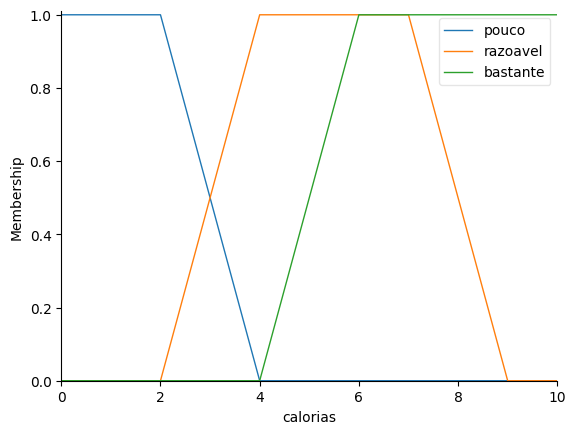

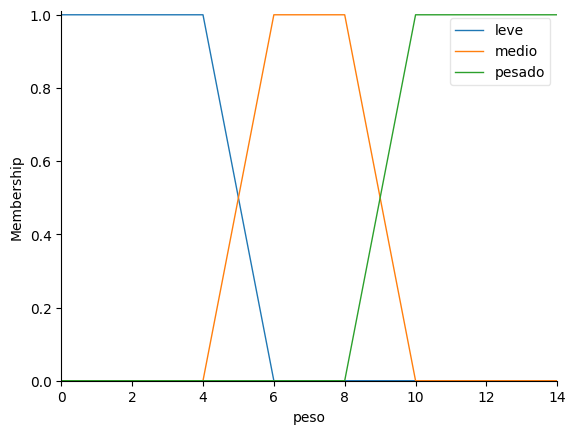

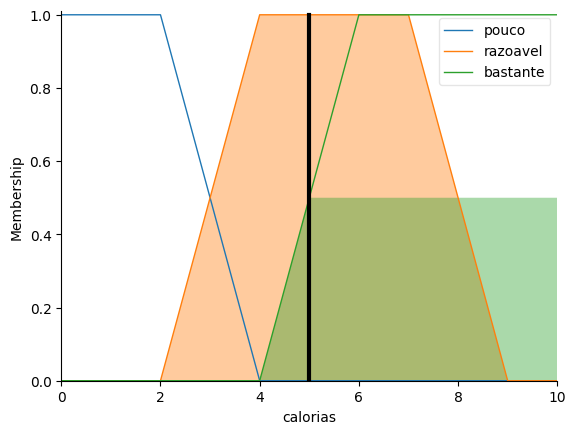

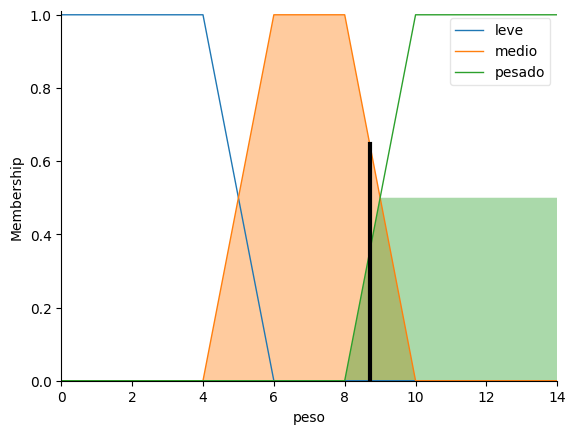

In [24]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Variaveis de Entrada (Antecedent)
calorias = ctrl.Antecedent(np.arange(0, 11, 1), 'calorias')
# servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

#Variaveis de saída (Consequent)
peso = ctrl.Consequent(np.arange(0, 15, 1), 'peso')

# automf -> Atribuição de categorias automaticamente
#servico.automf(names=['ruim','medio','bom'])

calorias['pouco'] = fuzz.trapmf(calorias.universe, [-1,0,2,4])
calorias['razoavel'] = fuzz.trapmf(calorias.universe, [2,4,7,9])
calorias['bastante'] = fuzz.trapmf(calorias.universe, [4,6,10,10])

# atribuicao sem o automf
peso['leve'] = fuzz.trapmf(peso.universe, [-1,0,4,6])
peso['medio'] = fuzz.trapmf(peso.universe, [4,6,8,10])
peso['pesado'] = fuzz.trapmf(peso.universe, [8,10,15,15])


#Visualizando as variáveis
calorias.view()
#servico.view()
peso.view()



#Criando as regras
regra_1 = ctrl.Rule(calorias['pouco'], peso['leve'])
regra_2 = ctrl.Rule(calorias['razoavel'], peso['medio'])
regra_3 = ctrl.Rule(calorias['bastante'], peso['pesado'])
#regra_4 = ctrl.Rule(servico['bom'] | qualidade['otima'], gorjeta['alta'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3])


#Simulando
CalculoPeso = ctrl.ControlSystemSimulation(controlador)

notaCalorias = int(input('Calorias: '))
# notaServico = int(input('Servico: '))
CalculoPeso.input['calorias'] = notaCalorias
# CalculoGorjeta.input['servico'] = notaServico
CalculoPeso.compute()

valorPeso = CalculoPeso.output['peso']

print("\nCaloria %d \nPeso de %5.2f" %(
        notaCalorias,
        valorPeso))


calorias.view(sim=CalculoPeso)
#servico.view(sim=CalculoGorjeta)
peso.view(sim=CalculoPeso)

plt.show()

Caloria, Atividade Física => Peso

Calorias: 1
Atividade: 1

Caloria 1 
Atividade Fisica 1 
Peso de  2.90


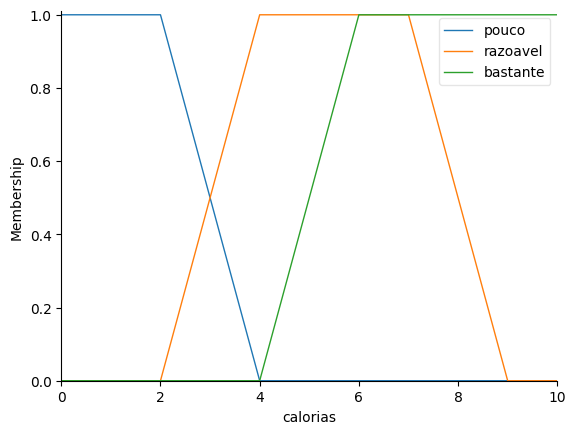

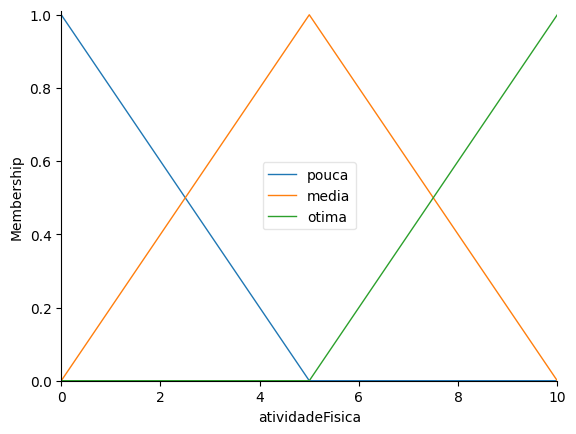

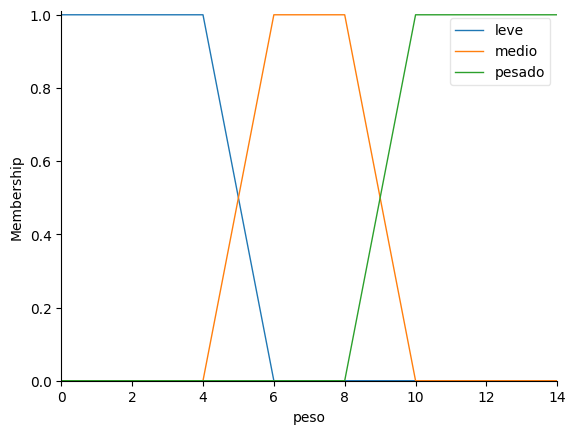

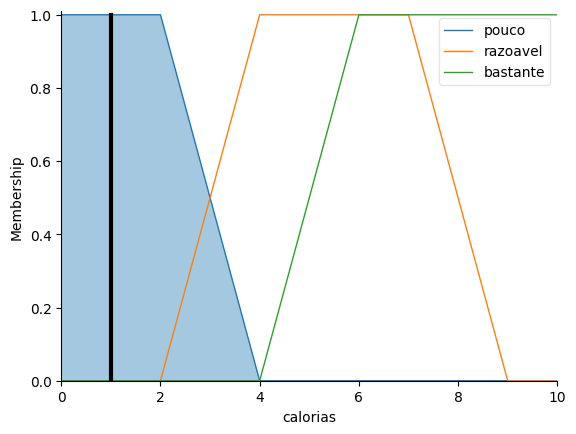

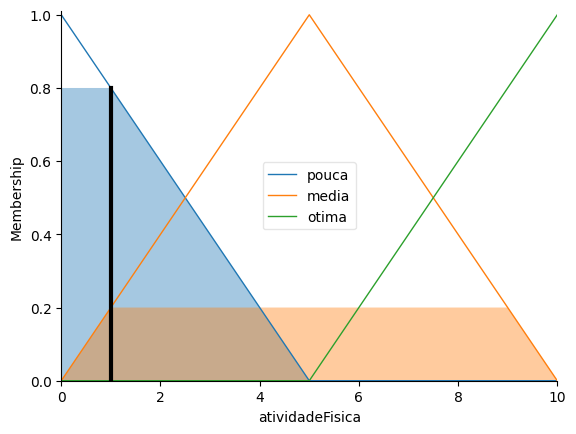

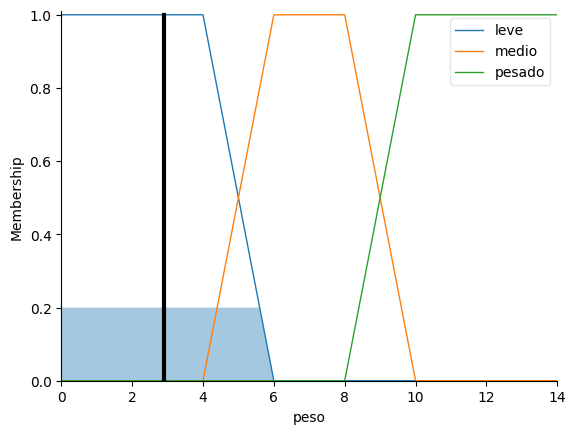

In [28]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Variaveis de Entrada (Antecedent)
calorias = ctrl.Antecedent(np.arange(0, 11, 1), 'calorias')
atividadeFisica = ctrl.Antecedent(np.arange(0, 11, 1), 'atividadeFisica')

#Variaveis de saída (Consequent)
peso = ctrl.Consequent(np.arange(0, 15, 1), 'peso')

# automf -> Atribuição de categorias automaticamente
atividadeFisica.automf(names=['pouca','media','otima'],)

calorias['pouco'] = fuzz.trapmf(calorias.universe, [-1,0,2,4])
calorias['razoavel'] = fuzz.trapmf(calorias.universe, [2,4,7,9])
calorias['bastante'] = fuzz.trapmf(calorias.universe, [4,6,10,10])

# atribuicao sem o automf
peso['leve'] = fuzz.trapmf(peso.universe, [-1,0,4,6])
peso['medio'] = fuzz.trapmf(peso.universe, [4,6,8,10])
peso['pesado'] = fuzz.trapmf(peso.universe, [8,10,15,15])


#Visualizando as variáveis
calorias.view()
atividadeFisica.view()
peso.view()



#Criando as regras
# regra_1 = ctrl.Rule(calorias['pouco'], peso['leve'])
# regra_2 = ctrl.Rule(calorias['razoavel'], peso['medio'])
# regra_3 = ctrl.Rule(calorias['bastante'], peso['pesado'])
regra_1 = ctrl.Rule(calorias['bastante'] & atividadeFisica['otima'], peso['medio'])
regra_2 = ctrl.Rule(calorias['razoavel'] & atividadeFisica['pouca'], peso['pesado'])
regra_3 = ctrl.Rule(calorias['razoavel'] & atividadeFisica['media'], peso['medio'])
regra_4 = ctrl.Rule(calorias['bastante'] & atividadeFisica['pouca'], peso['pesado'])
regra_5 = ctrl.Rule(calorias['pouco'] & atividadeFisica['media'], peso['leve'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3, regra_4, regra_5])


#Simulando
CalculoPeso = ctrl.ControlSystemSimulation(controlador)

notaCalorias = int(input('Calorias: '))
notatvFisica = int(input('Atividade: '))
CalculoPeso.input['calorias'] = notaCalorias
CalculoPeso.input['atividadeFisica'] = notatvFisica
CalculoPeso.compute()

valorPeso = CalculoPeso.output['peso']

print("\nCaloria %d \nAtividade Fisica %d \nPeso de %5.2f" %(
        notaCalorias,
        notatvFisica,
        valorPeso))


calorias.view(sim=CalculoPeso)
atividadeFisica.view(sim=CalculoPeso)
peso.view(sim=CalculoPeso)

plt.show()